**texto en negrita**<h1> Quantum measurements, Heisenberg's uncertainty principle and Bell inequalities </h1>

<h2>Simulating a measurement on a qubit</h2>

<h3>We import all the required libraries</h3>

We also import some extra ones just in case

In [2]:
%matplotlib inline
#from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
from qutip import *
plt.rcParams["figure.figsize"] = (12,9)

ModuleNotFoundError: No module named 'qutip'

In [ ]:
# Define the Phv measurement operator:
MOpz= sigmaz()
MOpx= sigmax()
MOpy= sigmay()

In [ ]:
ψ = ((2-1j)*basis(2,0)+(1-3j)*basis(2,1)).unit()
ψ2=(basis(2,0)+basis(2,1)).unit()
ψ3=basis(2,0)

<h3> Function to generate the lab results </h3>

The function to generate a data set of $N$ possible results for the measure of the 3 values of the spin operators on a randomly generated state.

The function uses the numpy function

random.choice(set_of_allowed_results, number_of_results_to_generate, probabilities_of_the_allowed_results)


In [ ]:
def GenerateLabResults(N):
    state=((np.random.random()+1j*np.random.random())*basis(2,0)+(np.random.random())*basis(2,1)).unit()
    oper=[0.5*sigmax(), 0.5*sigmay(), 0.5*sigmaz()]
    data=[]
    for k in oper:
        eigenv1 = k.eigenstates()[1][0]
        eigenv2 = k.eigenstates()[1][1]
        allowed_results = k.eigenstates()[0]
        probability_amps = [qo.full()[0][0] for qo in [eigenv1.dag()*state, eigenv2.dag()*state]]
        pvals = [abs(pa.conjugate()*pa) for pa in probability_amps]
        dataK=np.random.choice(allowed_results,size=N, p=pvals)
        data.append(dataK)
        print(state)
    return data

<h3> Statistical tools of the set of measurements </h3>

We have created a set of possible lab results for the three operators. From these "experimental" results we can try to identify their properties:

* data.var(): variance of the set "data"

* data.mean(): mean of the set "data"

* plt.hist(real(data)): represent a histogram from the results in the set "data"

In [ ]:
datax,datay,dataz=GenerateLabResults(1000000)
sx=datax.mean()
sy=datay.mean()
sz=dataz.mean()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.23574593+0.97181377j]
 [0.00136382+0.j        ]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.23574593+0.97181377j]
 [0.00136382+0.j        ]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.23574593+0.97181377j]
 [0.00136382+0.j        ]]


In [ ]:
print("Variance: ",datax.var())
print("Mean: ",datax.mean())

Variance:  0.24999999651900007
Mean:  5.9e-05


In [ ]:
print("Variance: ",datay.var())
print("Mean: ",datay.mean())

Variance:  0.24999470539899987
Mean:  -0.002301


In [ ]:
print("Variance: ",dataz.var())
print("Mean: ",dataz.mean())

Variance:  3.999983999999991e-06
Mean:  0.499996


(array([499941.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 500059.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

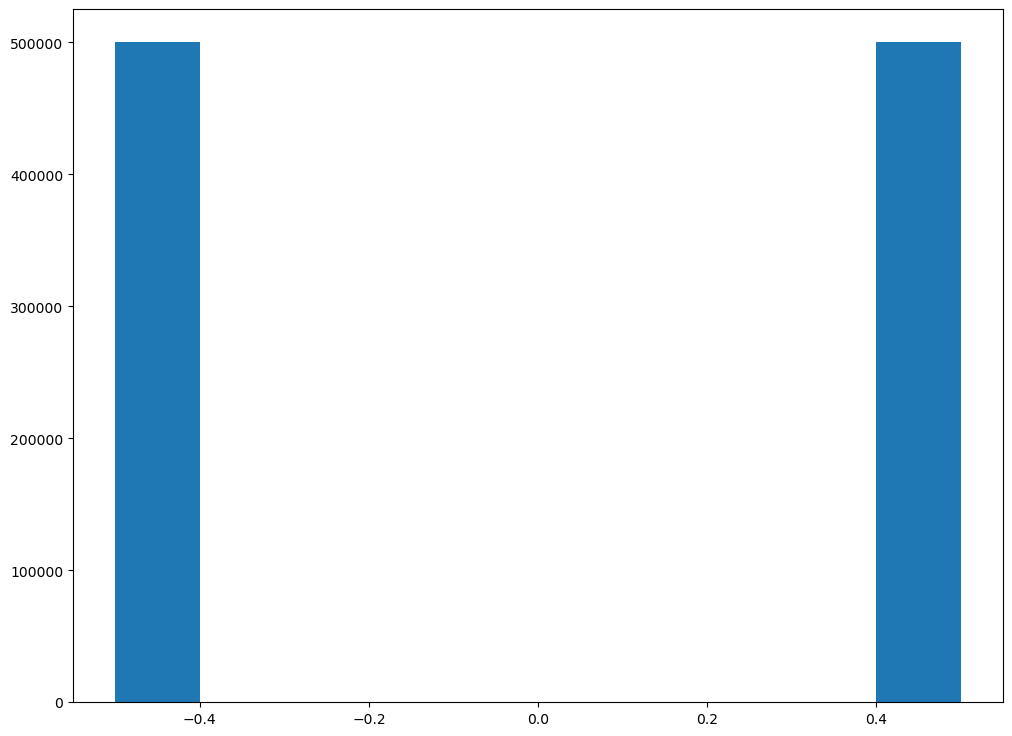

In [ ]:
plt.hist(np.real(datax))

(array([502301.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 497699.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

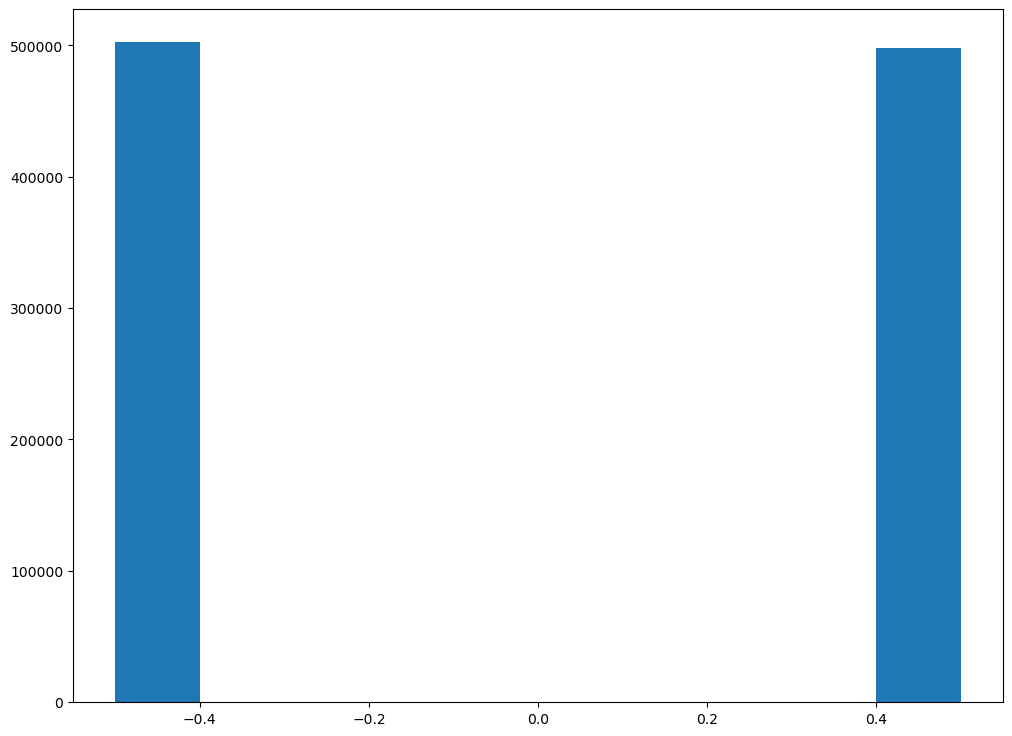

In [ ]:
plt.hist(np.real(datay))

(array([4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.99996e+05]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

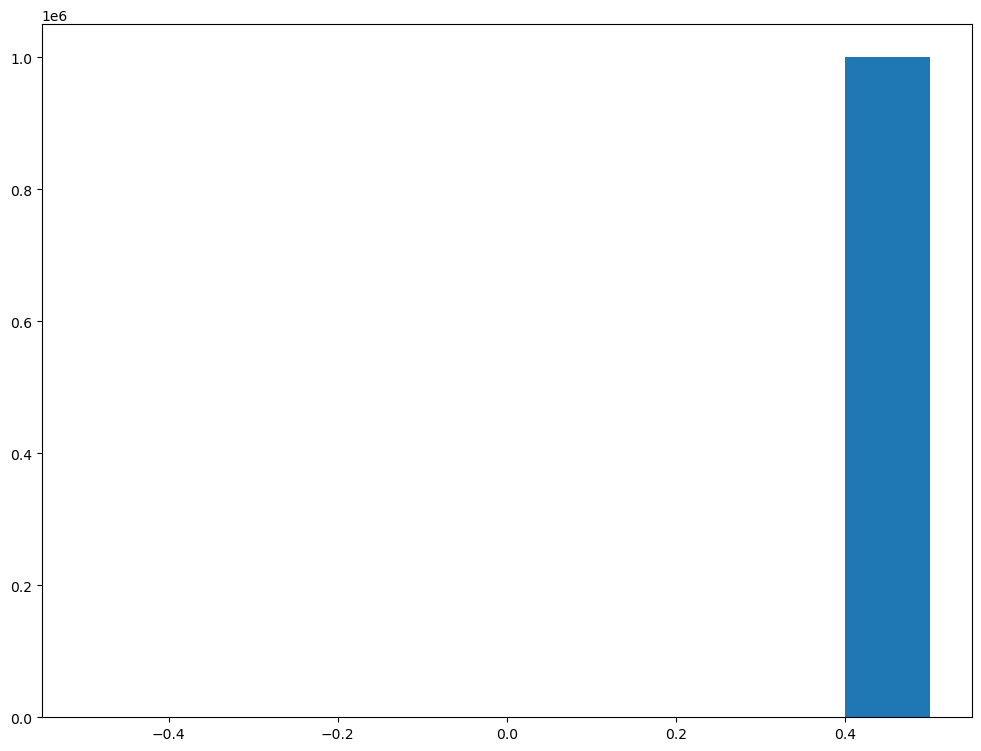

In [ ]:
plt.hist(np.real(dataz))

In [ ]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.7.5
Numpy,1.24.3
SciPy,1.11.1
matplotlib,3.7.2
Cython,3.0.9
Number of CPUs,6
BLAS Info,INTEL MKL
IPython,8.15.0
Python,"3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]


## Ejercicio 4.1. La medida cuántica.

## M1. Se identifique el estado con el que se han generado las medidas. ¿Es posible determinar completamente el vector de $\mathbb{C}^2$ que determina el estado, según el postulado I? ¿Por qué?

La forma general de un estado en forma polar biene dada por:

$$
    |\psi\rangle = \begin{pmatrix} r_1 e^{i\theta_1} \\ r_2 e^{i\theta_2} \end{pmatrix} \qquad r_1,r_2,\theta_1,\theta_2 \in \mathbb{C}
$$

A partir de las medidas de los observables $\hat\sigma_x,\hat\sigma_y,\hat\sigma_z$ podemos obtener información del estado utilizdo. Debido al primer postulado no podemos conocer el estado en su totalidad, la excepción es una constante compleja $\lambda$ que lo multiplica. Por lo tanto, podremos conocer el estado en la forma:

$$
    |\psi\rangle = \lambda \begin{pmatrix} r_1 \\ r_2 e^{i\varphi} \end{pmatrix} \qquad \varphi=\theta_2-\theta_1 \qquad \lambda \in \mathbb{C}
$$

Para conocer las componentes del estado calculamos el valor esperado de los operadores, $\langle\hat\sigma_x\rangle$, $\langle\hat\sigma_y\rangle$, $\langle\hat\sigma_z\rangle$.

$$
    \langle\hat\sigma_x\rangle = \langle\psi | \hat\sigma_x | \psi\rangle = 2r_1r_2cos\varphi
    \\ \langle\hat\sigma_y\rangle = \langle\psi | \hat\sigma_y | \psi\rangle = 2r_1r_2sin\varphi
    \\ \langle\hat\sigma_z\rangle = \langle\psi | \hat\sigma_z | \psi\rangle = r_1^2-r_2^2
$$

Resolviendo el sistema de ecuaciones llegamos a la expresión para cada componente:

$$
    r_1 = \sqrt{\frac{1}{2}(1+\langle\hat\sigma_z\rangle)}
    \\ r_2 = \sqrt{\frac{1}{2}(1-\langle\hat\sigma_z\rangle)}
    \\ \varphi = arccos(\frac{\langle\hat\sigma_x\rangle}{2r_1r_2})
$$

In [1]:
r1 = np.sqrt((1+dataz.mean()*2)*0.5)
r2 = np.sqrt((1-dataz.mean()*2)*0.5)
ϕ = np.arccos(datax.mean()/(r1*r2))

a = np.cos(ϕ)*r2
b = np.sqrt(r2*r2-a*a)

ψ = basis(2,0)*r1 + basis(2,1)*(r2*np.cos(ϕ)+r2*np.sin(ϕ)*1j)

ψ

NameError: name 'np' is not defined

El motivo por el que no podemos determinar completamente un estado es debido a que un mismo rayo cuántico está describe igualmente por un estado $|\psi\rangle$ que por un estado $\lambda|\psi\rangle$, por lo tanto no podemos saber cual le corresponde exactamente.

## M2. Estudiar cómo depende del tamaño de la muestra de puntos el error cometido al estimar los valores medios de las tres componentes del espín con la funciónanterior, que emplea una muestra finita.

## Ejercicio 4.2. El principio de incertidumbre.

## I1. Resolver el ejercicio 2.1

$$
\hat A \hat B=\frac 12(\hat A \hat B+\hat B \hat A)+\frac 12(\hat A \hat B- \hat B \hat A)=\frac 12[\hat A\hat B]_+ +\frac i2[\hat A\hat B]
$$

Donde:
$$
    [\hat A,\hat B]_+=\hat A\hat B+\hat A\hat B \qquad y  \qquad [\hat A,\hat B]=-i(\hat A\hat B-\hat A\hat B)
$$

En general se deben cumlpir las siguientes propiedades:
- El producto de los operadores autoadjuntos $\hat A\hat B$ no tiene por qué ser autoadjunto a su vez, sólo lo será en el caso de que ambos operadores conmuten.
- El anticonmutador $[\hat A,\hat B]_+$ de dos operadores autoadjuntos siempre es autoadjunto.
- El conmutador de dos operadores autoadjuntos $[\hat A,\hat B]$ , tal como se ha definido (con la unidad imaginaria), es siempre autoadjunto.

Demostración:

- El producto de los operadores autoadjuntos $\hat A\hat B$ no tiene por qué ser autoadjunto a su vez,  sólo lo será en el caso de que ambos operadores conmuten:

$$
(\hat A\hat B)^\dagger=\hat B^\dagger \hat A^\dagger=\hat B\hat A=\hat A\hat B
$$

La última igualdad sólo ocurre en el caso de que $\hat A$ y $\hat B$ conmuten.

- El anticonmutador $[\hat A,\hat B]_+$ de dos operadores autoadjuntos siempre es autoadjunto:

Es autoadjunto si $ [\hat A,\hat B]_+ ^ \dagger = [\hat A,\hat B]_+ $

$$
[\hat A,\hat B]_+ ^ {\dagger} = (\hat A\hat B+\hat B\hat A) ^ \dagger = (\hat A\hat B)^\dagger+(\hat B\hat A)^\dagger=\hat B^\dagger\hat A^\dagger+\hat A^\dagger\hat B^\dagger=\hat B\hat A+\hat A\hat B=[\hat A,\hat B]_+  
$$  


- El conmutador de dos operadores autoadjuntos $[\hat A,\hat B]$ , tal como se ha definido (con la unidad imaginaria), es siempre autoadjunto.

Es autoadjunto si $ [\hat A,\hat B] ^ \dagger = [\hat A,\hat B] $

$$
[\hat A,\hat B]^\dagger=[-i(\hat A\hat B-\hat B\hat A)]^\dagger=i(\hat A\hat B,\hat B\hat A)^\dagger=i[(\hat A\hat B)^\dagger-(\hat B\hat A)^\dagger]=i(\hat B\hat A-\hat A\hat B)=-i(\hat A\hat B-\hat B\hat A)=[\hat A,\hat B]
$$


## I2. Empleando las funciones de qutip (expect(operator, state) y variance(operator, state)) Construir un pequeño programa para verificar la fórmula (26) para el caso:

$$
\hat A = \hat\sigma_{x} \qquad \hat B = \hat\sigma_z
$$

Y evaluarlo en los estados:
$$
|\psi_1\rangle = |+\rangle
\\ |\psi_2\rangle = (0,160+0,801i)|+\rangle-(0,320+0,480i)|-\rangle
\\ |\psi_3\rangle = \frac{1}{\sqrt2}(|+\rangle+|-\rangle)
$$

La fórmula (26) es:

$$
    \Delta\hat A\Delta\hat B\geq\frac{1}{2}|\langle\psi|[\hat A,\hat B]|\psi\rangle|
$$

In [ ]:
A = sigmax()
B = sigmaz()

a = 0.160 + 0.801j
b = -0.320 - 0.480j

ψ1 = basis(2,0)
ψ2 = a*basis(2,0)+b*basis(2,1)
ψ3 = (basis(2,0)+basis(2,1)).unit()

def conmutador(A,B):
    return -1j*(A*B-B*A)

def incertidumbre(A,ψ):
    return np.sqrt(variance(A, ψ))

def Heisenberg(A,B,ψ):
    I = incertidumbre(A,ψ)*incertidumbre(B,ψ)
    E = expect(conmutador(A,B),ψ)
    if (I >= 0.5*E):
        print("Se cumple")
        print(I,E)
    else:
        print("No se cumple")
        print(I,E)

Heisenberg(A,B,ψ1)
Heisenberg(A,B,ψ2)
Heisenberg(A,B,ψ3)

Se cumple
0.0 0.0
Se cumple
0.4623994865034745 -0.71808
Se cumple
1.4901161193847655e-08 0.0


- ¿En qué ocasiones existirá la posibilidad de medir experimentalmente componentes del espín de una partícula de forma absolutamente precisa?

Únicamente se podrá conocer en el caso de que el autoestado no esté entrelazado, es decir, no estén mezclados las componentes $|+\rangle$ y $|-\rangle$. En este caso esto ocurre para el estado $|\psi_1\rangle$.

- ¿Es posible medir simultaneamente dos componentes cualesquiera en algún estado? ¿Y las tres?

- ¿Existe esa posibilidad para los operadores posición y momento actuando en un espacio de Hilbert funcional $\mathcal{L}^2 (D),d\mu$? ¿Por qué?

## Ejercicio 4.3. El teorema de Bell.

## B1. Ejercicio 2.2

## B2. Estudiar el Teorema 2.1

In [ ]:
Q = tensor(sigmaz(),qeye(2))
R = tensor(sigmax(),qeye(2))
S = -tensor(qeye(2),sigmaz()*sigmaz()+sigmax()*sigmax())/np.sqrt(2)
T = tensor(qeye(2),sigmaz()*sigmaz()-sigmax()*sigmax())/np.sqrt(2)

def bell(ψ):
    C=Q*S+R*S+R*T-Q*T
    if (expect(C,ψ)<=2):
        print("Se cumple")
        print(expect(C,ψ))
    else:
        print("No se cumple")

## Estados. ψ1 y ψ3 con Clebsh-Gordan

ψ1 = (tensor(basis(2,0),basis(2,1))-tensor(basis(2,1),basis(2,0)))/np.sqrt(2)
ψ2 = (tensor(basis(2,0),basis(2,0))-tensor(basis(2,1),basis(2,1)))/np.sqrt(2)
ψ3 = tensor(basis(2,0),basis(2,0))
ψ4 = (tensor(basis(2,0),basis(2,1))+tensor(basis(2,0),basis(2,0)))/np.sqrt(2)

bell(ψ1)
bell(ψ2)
bell(ψ3)
bell(ψ4)

Se cumple
0.0
Se cumple
0.0
Se cumple
-1.414213562373095
Se cumple
-1.4142135623730947


## B3. ¿Cualquier sistema cuántico va a violar la desigualdad de Bell para cualquier conjunto de operadores? ¿Siempre lo hará si se encuentra en un estado entrelazado? ¿Existe un conjunto de operadores adaptados al estado |Ψ2〉?